# Fiber Photometry Example Session

In [1]:
from stream_nwbfile import stream_nwbfile
import numpy as np
import matplotlib.pyplot as plt

This notebook showcases one example session from the 000971 dataset containing operant behavior and concurrent fiber photometry recordings.

In [2]:
DANDISET_ID = '000971'
file_path = 'sub-112-283/sub-112-283_ses-FP-PS-2019-06-20T09-32-04_behavior.nwb'
nwbfile, io = stream_nwbfile(DANDISET_ID, file_path)
display(nwbfile)

,location,indicator,optical_fiber,excitation_source,photodetector,dichroic_mirror,coordinates,commanded_voltage_series,emission_filter,excitation_filter
id,,,,,,,,,,
0,DMS,"dms_green_fluorophore abc.Indicator at 0x4985524560\nFields:\n description: Mice for fiber photometry experiments received infusions of 1ml of AAV5-CAG-FLEX-jGCaMP7b-WPRE (1.02e13 vg/mL, Addgene, lot 18-429) into lateral SNc (AP 3.1, ML 1.3, DV 4.2) in one hemisphere and medial SNc (AP 3.1, ML 0.8, DV 4.7) in the other. Hemispheres were counterbalanced between mice.\n injection_coordinates_in_mm: [3.1 0.8 4.7]\n injection_location: medial SNc\n label: GCaMP7b\n manufacturer: Addgene\n","optical_fiber abc.OpticalFiber at 0x4985528784\nFields:\n core_diameter_in_um: 400.0\n description: Fiber optic implants (Doric Lenses; 400 um, 0.48 NA) were placed above DMS (AP 0.8, ML 1.5, DV 2.8) and DLS (AP 0.1, ML 2.8, DV 3.5). The DMS implant was placed in the hemisphere receiving a medial SNc viral injection, while the DLS implant was placed in the hemisphere receiving a lateral SNc viral injection. Calcium signals from dopamine terminals in DMS and DLS were recorded during RI30, on the first and last days of RI60/RR20 training as well as on both footshock probes for each mouse. All recordings were done using a fiber photometry rig with optical components from Doric lenses controlled by a real-time processor from Tucker Davis Technologies (TDT; RZ5P). TDT Synapse software was used for data acquisition.\n manufacturer: Doric Lenses\n model: Fiber Optic Implant\n numerical_aperture: 0.48\n","excitation_source_calcium_signal abc.ExcitationSource at 0x4985527200\nFields:\n description: 465nm and 405nm LEDs were modulated at 211 Hz and 330 Hz, respectively, for DMS probes. 465nm and 405nm LEDs were modulated at 450 Hz and 270 Hz, respectively for DLS probes. LED currents were adjusted in order to return a voltage between 150-200mV for each signal, were offset by 5 mA, were demodulated using a 4 Hz lowpass frequency filter.\n excitation_wavelength_in_nm: 465.0\n illumination_type: LED\n manufacturer: Doric Lenses\n model: Connectorized LED\n","photodetector abc.Photodetector at 0x4985530176\nFields:\n description: This battery-operated photoreceiver has high gain and detects CW light signals in the sub-picowatt to nanowatt range. When used in conjunction with a modulated light source and a lock-in amplifier to reduce the measurement bandwidth, it achieves sensitivity levels in the femtowatt range. Doric offer this Newport product with add-on fiber optic adapter that improves coupling efficiency between the large core, high NA optical fibers used in Fiber Photometry and relatively small detector area. Its output analog voltage (0-5 V) can be monitored with an oscilloscope or with a DAQ board to record the data with a computer.\n detected_wavelength_in_nm: 525.0\n detector_type: photodiode\n gain: 10000000000.0\n manufacturer: Doric Lenses\n model: Newport Visible Femtowatt Photoreceiver Module\n","dichroic_mirror abc.DichroicMirror at 0x4985523120\nFields:\n description: Dual excitation band fiber photometry measurements use a Fluorescence Mini Cube with 4 ports: one port for the functional fluorescence excitation light, one for the isosbestic excitation, one for the fluorescence detection, and one for the sample. The cube has dichroic mirrors to combine isosbestic and fluorescence excitations and separate the fluorescence emission and narrow bandpass filters limiting the excitation fluorescence spectrum.\n manufacturer: Doric Lenses\n model: 4 ports Fluorescence Mini Cube - GCaMP\n","[0.8, 1.5, 2.8]","commanded_voltage_series_dms abc.CommandedVoltageSeries at 0x4983888848\nFields:\n comments: no comments\n conversion: 1.0\n data: <HDF5 dataset ""data"": shape (22570496,), type ""<f4"">\n description: The commanded voltage for the frequency-modulated DMS calcium signal and DMS isosbestic control.\n frequency__unit: hertz\n offset: 0.0\n rate: 6103.515625\n resolution: -1.0\

Retrieve Photometry and Behavioral Data

In [39]:
# Photometry
fiber_photometry_responses = nwbfile.acquisition['fiber_photometry_response_series'].data[:]
dms_calcium_signal = fiber_photometry_responses[:, 0]
dms_isosbestic_control = fiber_photometry_responses[:, 1]
dls_calcium_signal = fiber_photometry_responses[:, 2]
dls_isosbestic_control = fiber_photometry_responses[:, 3]
fs = nwbfile.acquisition['fiber_photometry_response_series'].rate
timestamps = np.arange(0, len(dms_calcium_signal) / fs, 1/fs)

# Behavior
left_nose_poke_times = nwbfile.processing['behavior'].data_interfaces['left_nose_poke_times'].timestamps[:]
left_reward_times = nwbfile.processing['behavior'].data_interfaces['left_reward_times'].timestamps[:]
reward_port_intervals = nwbfile.processing['behavior'].data_interfaces['behavioral_epochs'].interval_series['reward_port_intervals']
reward_port_interval_data = reward_port_intervals.data[:]
reward_port_interval_times = reward_port_intervals.timestamps[:]
reward_port_entry_times = reward_port_interval_times[reward_port_interval_data==1]
reward_port_exit_times = reward_port_interval_times[reward_port_interval_data==-1]

Plot

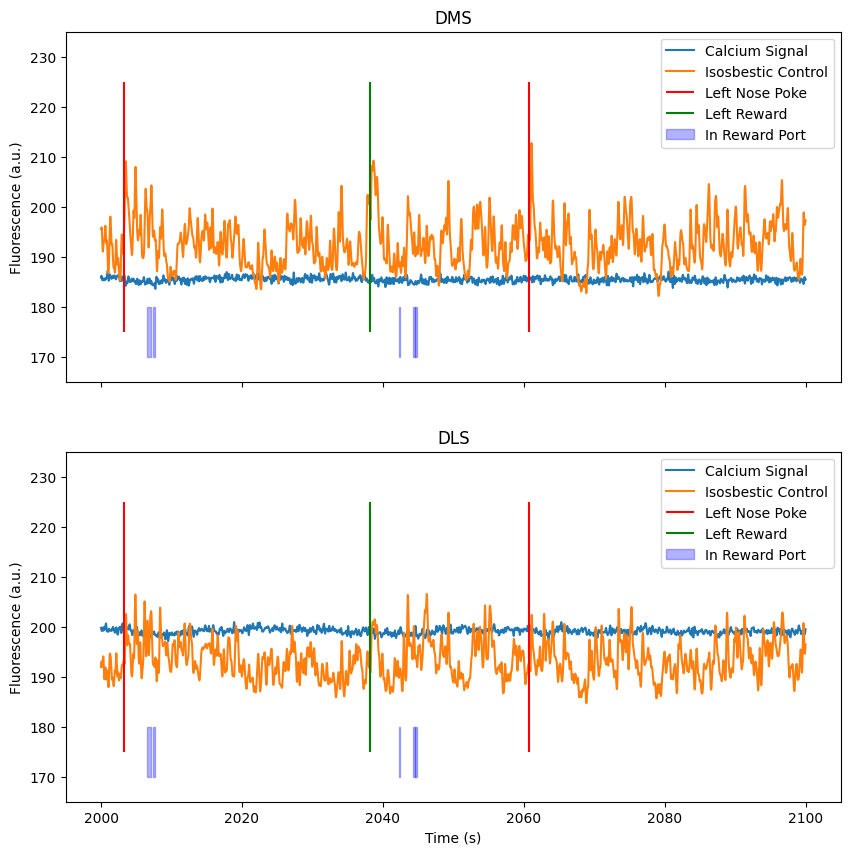

In [65]:
t_start = 2000
t_end = 2100
photometry_slice = slice(int(t_start * fs), int(t_end * fs))
left_nose_poke_mask = np.logical_and(left_nose_poke_times >= t_start, left_nose_poke_times < t_end)
left_reward_mask = np.logical_and(left_reward_times >= t_start, left_reward_times < t_end)
reward_port_interval_mask = np.logical_and(reward_port_entry_times >= t_start, reward_port_entry_times < t_end)
lineoffsets = 200
linelengths = 50
y = np.arange(170, 180, 0.1)
alpha = 0.3
ylim = [165, 235]

fix, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
ax[0].plot(timestamps[photometry_slice], dms_calcium_signal[photometry_slice], label='Calcium Signal')
ax[0].plot(timestamps[photometry_slice], dms_isosbestic_control[photometry_slice], label='Isosbestic Control')
ax[0].eventplot(left_nose_poke_times[left_nose_poke_mask], lineoffsets=lineoffsets, linelengths=linelengths, color='r', label='Left Nose Poke')
ax[0].eventplot(left_reward_times[left_reward_mask], lineoffsets=lineoffsets, linelengths=linelengths, color='g', label='Left Reward')
for i, (reward_port_entry_time, reward_port_exit_time) in enumerate(zip(reward_port_entry_times[reward_port_interval_mask], reward_port_exit_times[reward_port_interval_mask])):
    x1 = reward_port_entry_time*np.ones(len(y))
    x2 = reward_port_exit_time*np.ones(len(y))
    if i == 0:
        ax[0].fill_betweenx(y, x1, x2, color='b', alpha=alpha, label='In Reward Port')
    else:
        ax[0].fill_betweenx(y, x1, x2, color='b', alpha=alpha)
ax[0].set_ylim(ylim)
ax[0].set_title('DMS')
ax[0].legend()
ax[0].set_ylabel('Fluorescence (a.u.)')

ax[1].plot(timestamps[photometry_slice], dls_calcium_signal[photometry_slice], label='Calcium Signal')
ax[1].plot(timestamps[photometry_slice], dls_isosbestic_control[photometry_slice], label='Isosbestic Control')
ax[1].eventplot(left_nose_poke_times[left_nose_poke_mask], lineoffsets=lineoffsets, linelengths=linelengths, color='r', label='Left Nose Poke')
ax[1].eventplot(left_reward_times[left_reward_mask], lineoffsets=lineoffsets, linelengths=linelengths, color='g', label='Left Reward')
for i, (reward_port_entry_time, reward_port_exit_time) in enumerate(zip(reward_port_entry_times[reward_port_interval_mask], reward_port_exit_times[reward_port_interval_mask])):
    x1 = reward_port_entry_time*np.ones(len(y))
    x2 = reward_port_exit_time*np.ones(len(y))
    if i == 0:
        ax[1].fill_betweenx(y, x1, x2, color='b', alpha=alpha, label='In Reward Port')
    else:
        ax[1].fill_betweenx(y, x1, x2, color='b', alpha=alpha)
ax[1].set_ylim(ylim)
ax[1].set_title('DLS')
ax[1].legend()
ax[1].set_xlabel('Time (s)')
_ = ax[1].set_ylabel('Fluorescence (a.u.)')

Zoom in for more detail

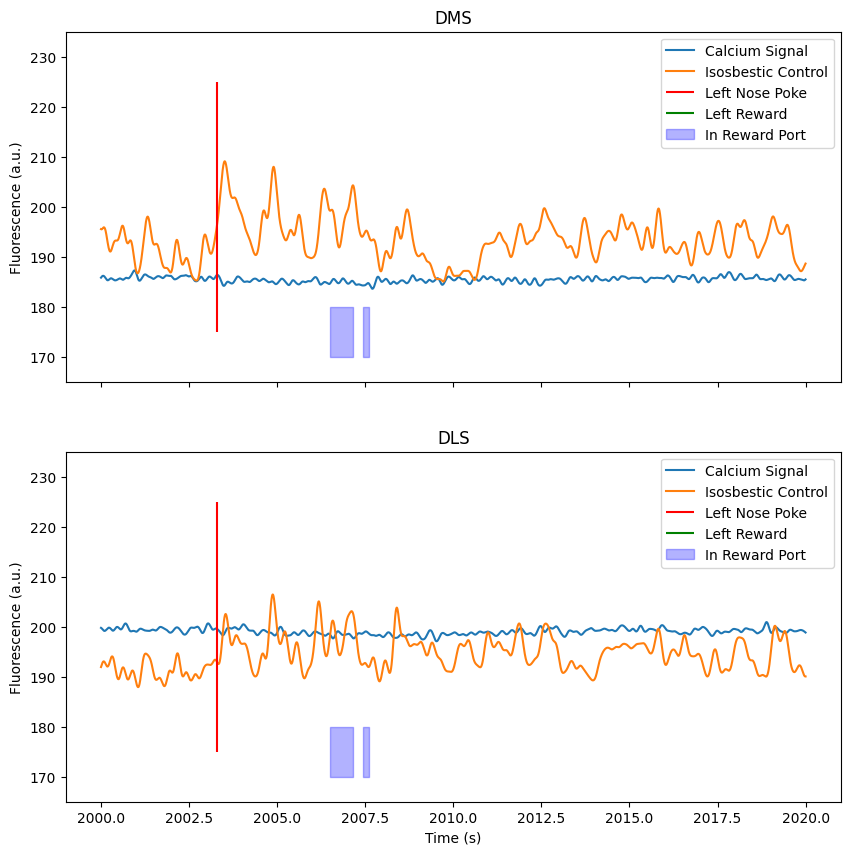

In [66]:
t_start = 2000
t_end = 2020
photometry_slice = slice(int(t_start * fs), int(t_end * fs))
left_nose_poke_mask = np.logical_and(left_nose_poke_times >= t_start, left_nose_poke_times < t_end)
left_reward_mask = np.logical_and(left_reward_times >= t_start, left_reward_times < t_end)
reward_port_interval_mask = np.logical_and(reward_port_entry_times >= t_start, reward_port_entry_times < t_end)
lineoffsets = 200
linelengths = 50
y = np.arange(170, 180, 0.1)
alpha = 0.3
ylim = [165, 235]

fix, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
ax[0].plot(timestamps[photometry_slice], dms_calcium_signal[photometry_slice], label='Calcium Signal')
ax[0].plot(timestamps[photometry_slice], dms_isosbestic_control[photometry_slice], label='Isosbestic Control')
ax[0].eventplot(left_nose_poke_times[left_nose_poke_mask], lineoffsets=lineoffsets, linelengths=linelengths, color='r', label='Left Nose Poke')
ax[0].eventplot(left_reward_times[left_reward_mask], lineoffsets=lineoffsets, linelengths=linelengths, color='g', label='Left Reward')
for i, (reward_port_entry_time, reward_port_exit_time) in enumerate(zip(reward_port_entry_times[reward_port_interval_mask], reward_port_exit_times[reward_port_interval_mask])):
    x1 = reward_port_entry_time*np.ones(len(y))
    x2 = reward_port_exit_time*np.ones(len(y))
    if i == 0:
        ax[0].fill_betweenx(y, x1, x2, color='b', alpha=alpha, label='In Reward Port')
    else:
        ax[0].fill_betweenx(y, x1, x2, color='b', alpha=alpha)
ax[0].set_ylim(ylim)
ax[0].set_title('DMS')
ax[0].legend()
ax[0].set_ylabel('Fluorescence (a.u.)')

ax[1].plot(timestamps[photometry_slice], dls_calcium_signal[photometry_slice], label='Calcium Signal')
ax[1].plot(timestamps[photometry_slice], dls_isosbestic_control[photometry_slice], label='Isosbestic Control')
ax[1].eventplot(left_nose_poke_times[left_nose_poke_mask], lineoffsets=lineoffsets, linelengths=linelengths, color='r', label='Left Nose Poke')
ax[1].eventplot(left_reward_times[left_reward_mask], lineoffsets=lineoffsets, linelengths=linelengths, color='g', label='Left Reward')
for i, (reward_port_entry_time, reward_port_exit_time) in enumerate(zip(reward_port_entry_times[reward_port_interval_mask], reward_port_exit_times[reward_port_interval_mask])):
    x1 = reward_port_entry_time*np.ones(len(y))
    x2 = reward_port_exit_time*np.ones(len(y))
    if i == 0:
        ax[1].fill_betweenx(y, x1, x2, color='b', alpha=alpha, label='In Reward Port')
    else:
        ax[1].fill_betweenx(y, x1, x2, color='b', alpha=alpha)
ax[1].set_ylim(ylim)
ax[1].set_title('DLS')
ax[1].legend()
ax[1].set_xlabel('Time (s)')
_ = ax[1].set_ylabel('Fluorescence (a.u.)')